In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
df = pd.read_csv(r'Data.csv')
df.head()

/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/3953266903.py:14: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Questions (30% each):
1. In the data, there are two values of host_identity_verified. Which value is larger?
2. What are the top 2 neighbourhood_group?
3. How many room types are in the data, and what are their proportions?
4. Option (10% bonus):
Please describe your insight and finding (if have) from the cleaned data and visualization
figures.

In [3]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.isna().any()

id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


In [6]:
host_identity_verified = df['host_identity_verified']

# Count the number of occurrences of each unique value
value_counts = host_identity_verified.value_counts()
value_counts

unconfirmed    51200
verified       51110
Name: host_identity_verified, dtype: int64

In [7]:
neighbourhood_group = df['neighbourhood group']

value_counts = neighbourhood_group.value_counts()

top_two_values = value_counts.index[:2]

top_two_values

Index(['Manhattan', 'Brooklyn'], dtype='object')

In [8]:
room_type = df['room type']
nunique = room_type.nunique()

value_counts = room_type.value_counts()

proportions = value_counts / len(room_type)

print(f'Number of unique values: {nunique}')
print('Proportions:')
print(proportions)

Number of unique values: 4
Proportions:
Entire home/apt    0.523407
Private room       0.453767
Shared room        0.021696
Hotel room         0.001131
Name: room type, dtype: float64


<AxesSubplot:>

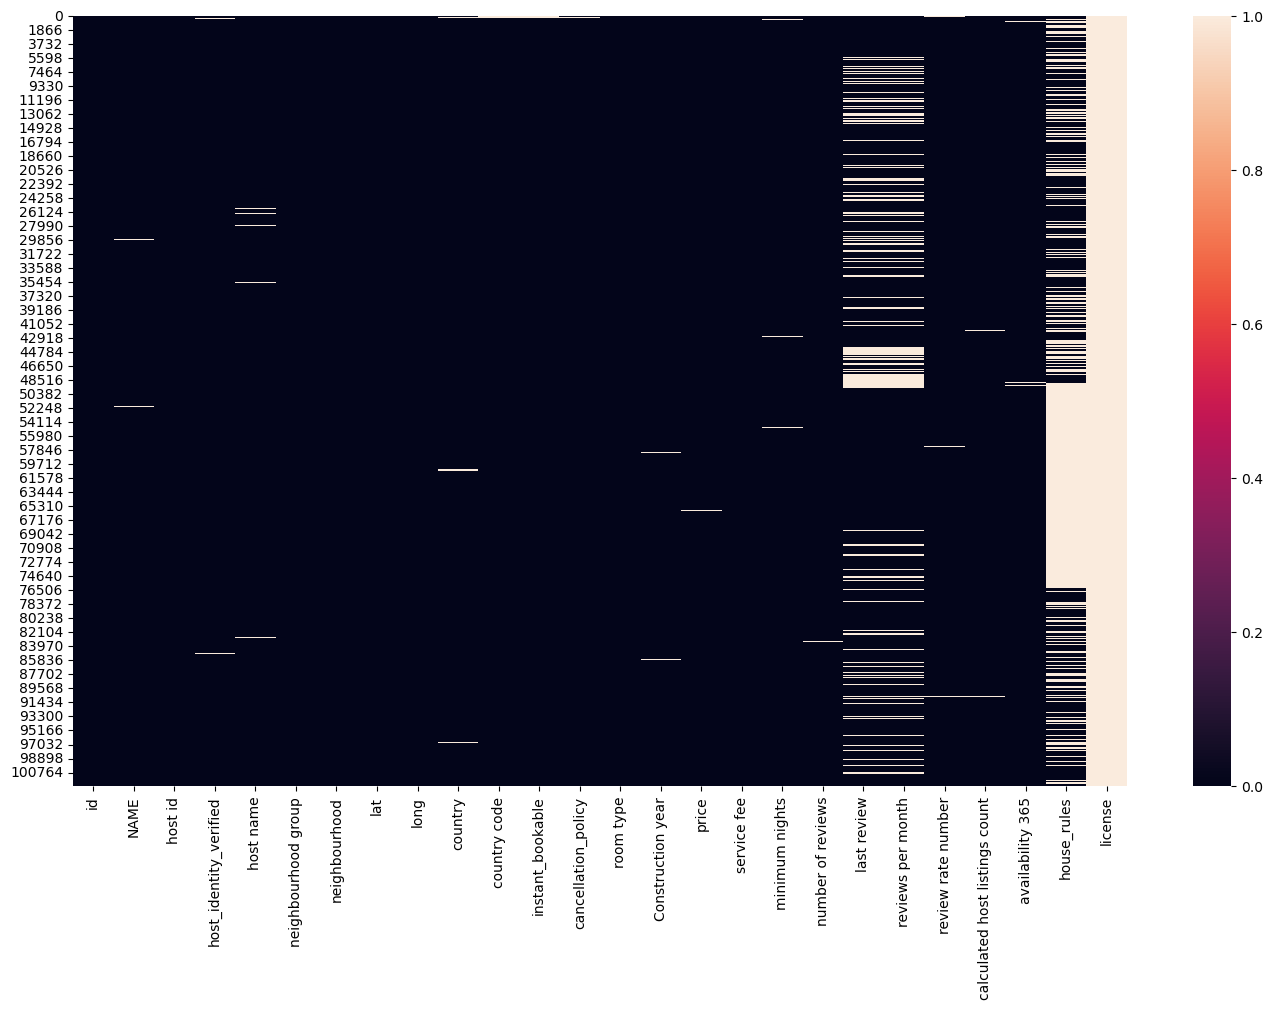

In [9]:
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())

In [17]:
df2=df.copy()
df_clean=df2.loc[~df2['host name'].isnull()]
df_clean['NAME'].replace({np.nan:'Missing'},inplace=True)
df_clean['host_identity_verified'].replace({np.nan:'Missing'},inplace=True)
df_clean['neighbourhood group'].replace({np.nan:'Missing'},inplace=True)
df_clean['neighbourhood'].replace({np.nan:'Missing'},inplace=True)
df_clean['country'].replace({np.nan:'Missing'},inplace=True)

df_clean['reviews per month'].fillna(df_clean['reviews per month'].median(),inplace=True)
df_clean['last review'].fillna(df_clean['last review'].mode().values[0],inplace=True)

/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/3779769900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NAME'].replace({np.nan:'Missing'},inplace=True)
/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/3779769900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['host_identity_verified'].replace({np.nan:'Missing'},inplace=True)
/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/3779769900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [18]:
df_clean['price'] = df_clean['price'].replace('[\$,]', '', regex=True).replace(' ', '', regex=True)
df_clean['price'] = df_clean['price'].astype(float)

df_clean['service fee'] = df_clean['service fee'].replace('[\$,]', '', regex=True).replace(' ', '', regex=True)
df_clean['service fee'] = df_clean['service fee'].astype(float)

df_clean['price']

/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/423029371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].replace('[\$,]', '', regex=True).replace(' ', '', regex=True)
/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/423029371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype(float)
/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/423029371.py:4: SettingWithCopyWarning: 
A v

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102193, dtype: float64

In [19]:
df_clean['price'].fillna(df_clean['price'].median(),inplace=True)


/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/4178717329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'].fillna(df_clean['price'].median(),inplace=True)


In [20]:
df_clean['Construction year'].fillna(df_clean['Construction year'].median(),inplace=True)
df_clean['service fee'].fillna(df_clean['service fee'].median(),inplace=True)
df_clean['minimum nights'].fillna(df_clean['minimum nights'].median(),inplace=True)
df_clean['number of reviews'].fillna(df_clean['number of reviews'].median(),inplace=True)

df_clean['cancellation_policy'].replace({np.nan:'Missing'},inplace=True)
df_clean['instant_bookable'].replace({np.nan:'Missing'},inplace=True)
df_clean['country code'].replace({np.nan:'Missing'},inplace=True)
df_clean['review rate number'].fillna(df_clean['review rate number'].median(), inplace=True)

df_clean['calculated host listings count'].fillna(df_clean['calculated host listings count'].median(), inplace=True)

df_clean['availability 365'].fillna(df_clean['availability 365'].median(), inplace=True)
df_clean

/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/508980244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Construction year'].fillna(df_clean['Construction year'].median(),inplace=True)
/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/508980244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['service fee'].fillna(df_clean['service fee'].median(),inplace=True)
/var/folders/6n/ky8mn4_90zs6q9h4dk0w4r5c0000gn/T/ipykernel_7613/508980244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Missing,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,6/23/2019,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,Missing,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,6/23/2019,0.74,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,6/23/2019,0.74,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [23]:
df_clean.drop(columns=['house_rules','license'],inplace=True, axis = 1)

KeyError: "['house_rules', 'license'] not found in axis"

In [24]:
df_clean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,id,0
1,NAME,0
2,host id,0
3,host_identity_verified,0
4,host name,0
5,neighbourhood group,0
6,neighbourhood,0
7,lat,8
8,long,8
9,country,0


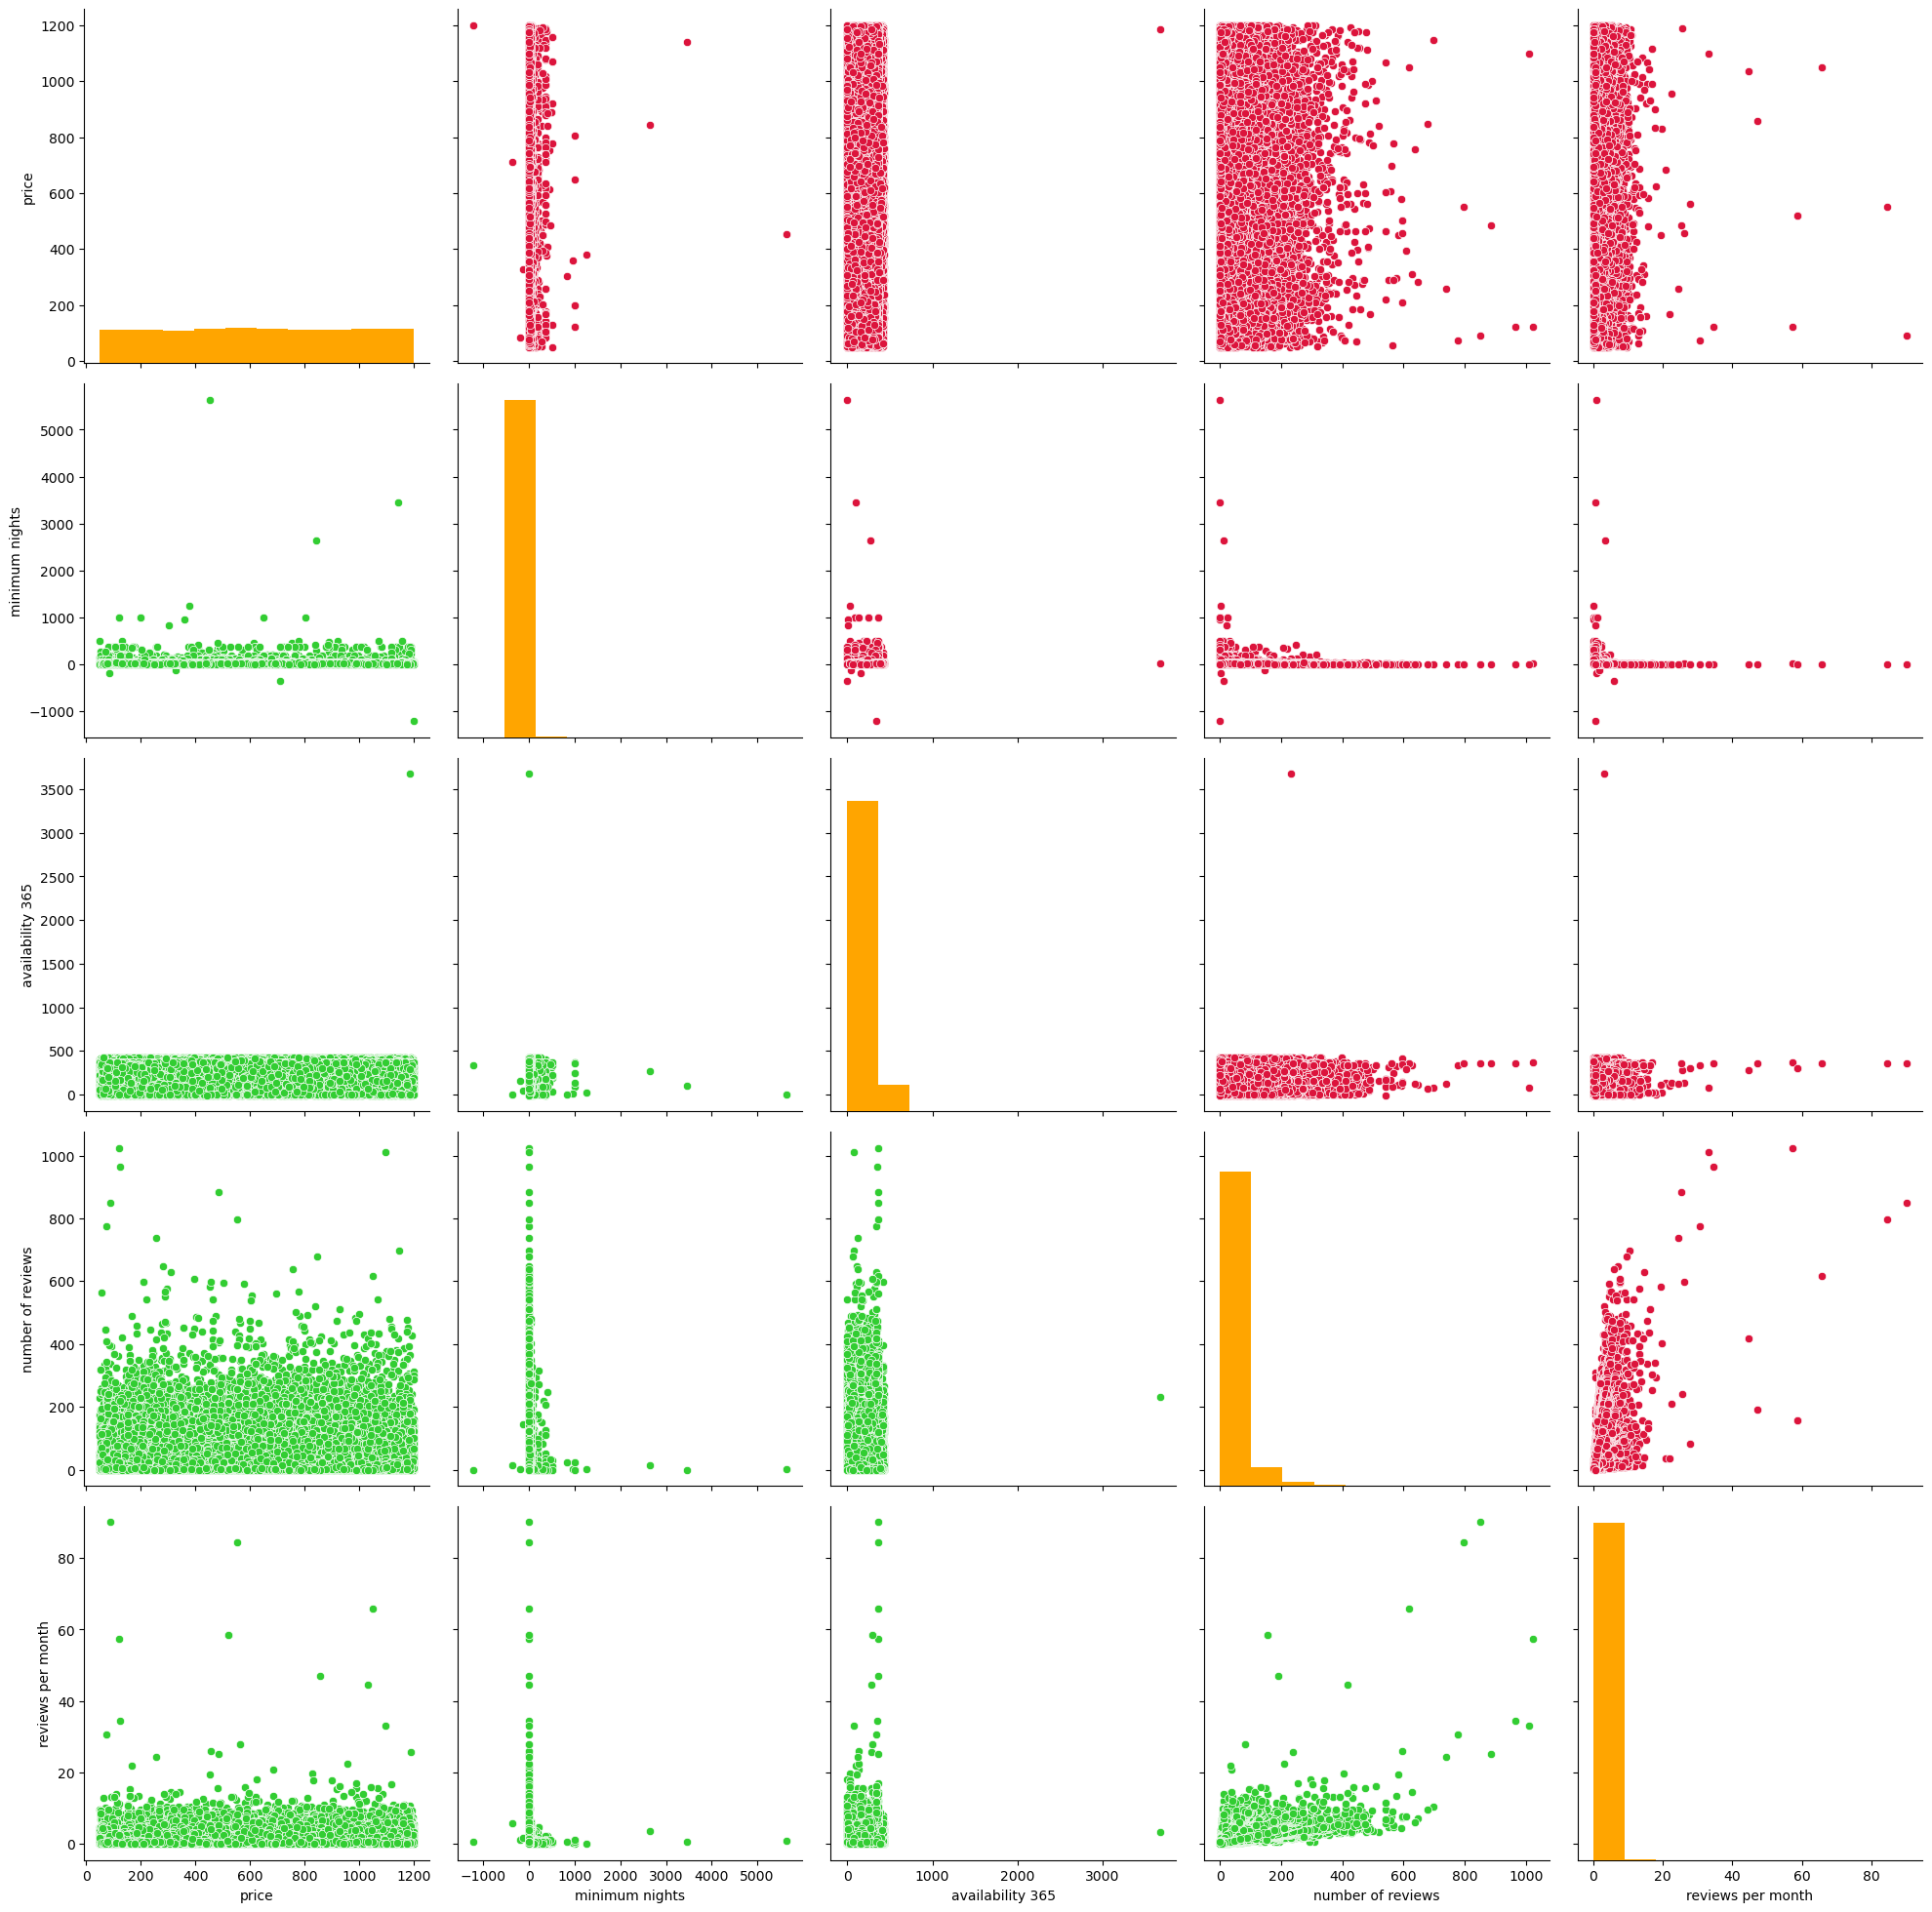

In [25]:
g = sns.PairGrid(df_clean, vars=['price', 'minimum nights', 'availability 365', 'number of reviews', 'reviews per month'], height=4)

# Setting color
g.map_upper(sns.scatterplot, color='crimson')
g.map_lower(sns.scatterplot, color='limegreen')
g.map_diag(plt.hist, color='orange')

# Show figure
plt.show()

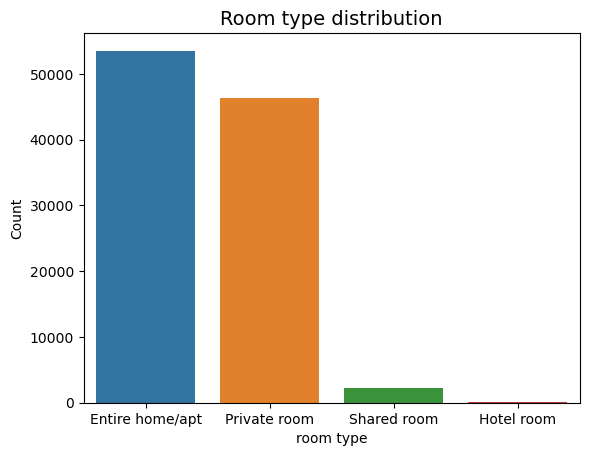

In [26]:
room = df_clean['room type'].value_counts().reset_index().rename(columns={'index':'room type','room type':'Count'})

sns.barplot(x='room type',y='Count', data=room).set_title('Room type distribution', fontsize=14) ;

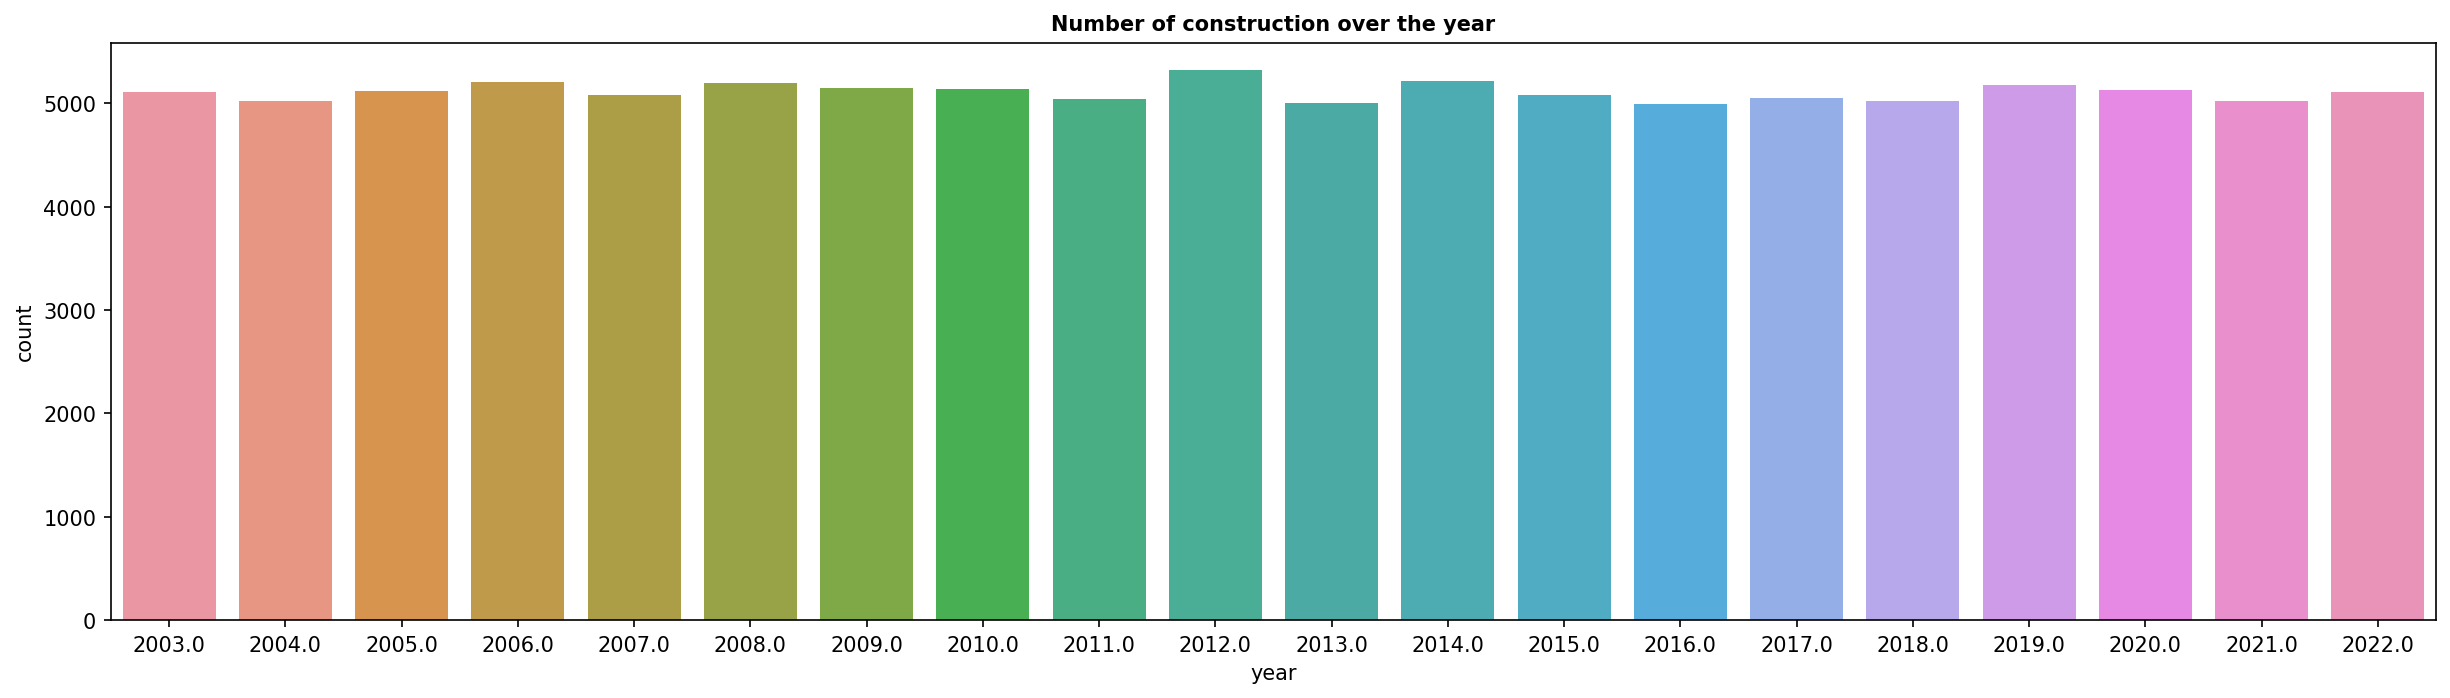

In [58]:
evolution = df_clean[['Construction year','host id']].groupby('Construction year').count().reset_index().rename(columns={'Construction year':'year','host id':'count'})
fig = plt.figure(figsize=(20,5), dpi=150)
sns.barplot(x='year',y='count',data=evolution).set_title('Number of construction over the year', fontsize=10,weight='bold') ;

In [28]:
df_clean.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.021930e+05,1.021930e+05,102185.000000,102185.000000,102193.000000,102193.000000,102193.000000,102193.000000,102193.000000,102193.000000,102193.000000,102193.000000,102193.000000
mean,2.915568e+07,4.925112e+10,40.728093,-73.949647,2012.483839,625.290392,125.026646,8.120654,27.466862,1.276829,3.277954,7.921756,141.044328
std,1.625773e+07,2.854038e+10,0.055852,0.049492,5.759414,331.276755,66.238177,30.547559,49.496046,1.622957,1.283071,32.223762,135.160250
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.505571e+07,2.456785e+10,40.688750,-73.982560,2008.000000,341.000000,68.000000,2.000000,1.000000,0.280000,2.000000,1.000000,3.000000
50%,2.915870e+07,4.910610e+10,40.722300,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,97.000000
75%,4.319208e+07,7.399566e+10,40.762750,-73.932340,2017.000000,912.000000,182.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Text(0.5, 0, 'Listing average price')

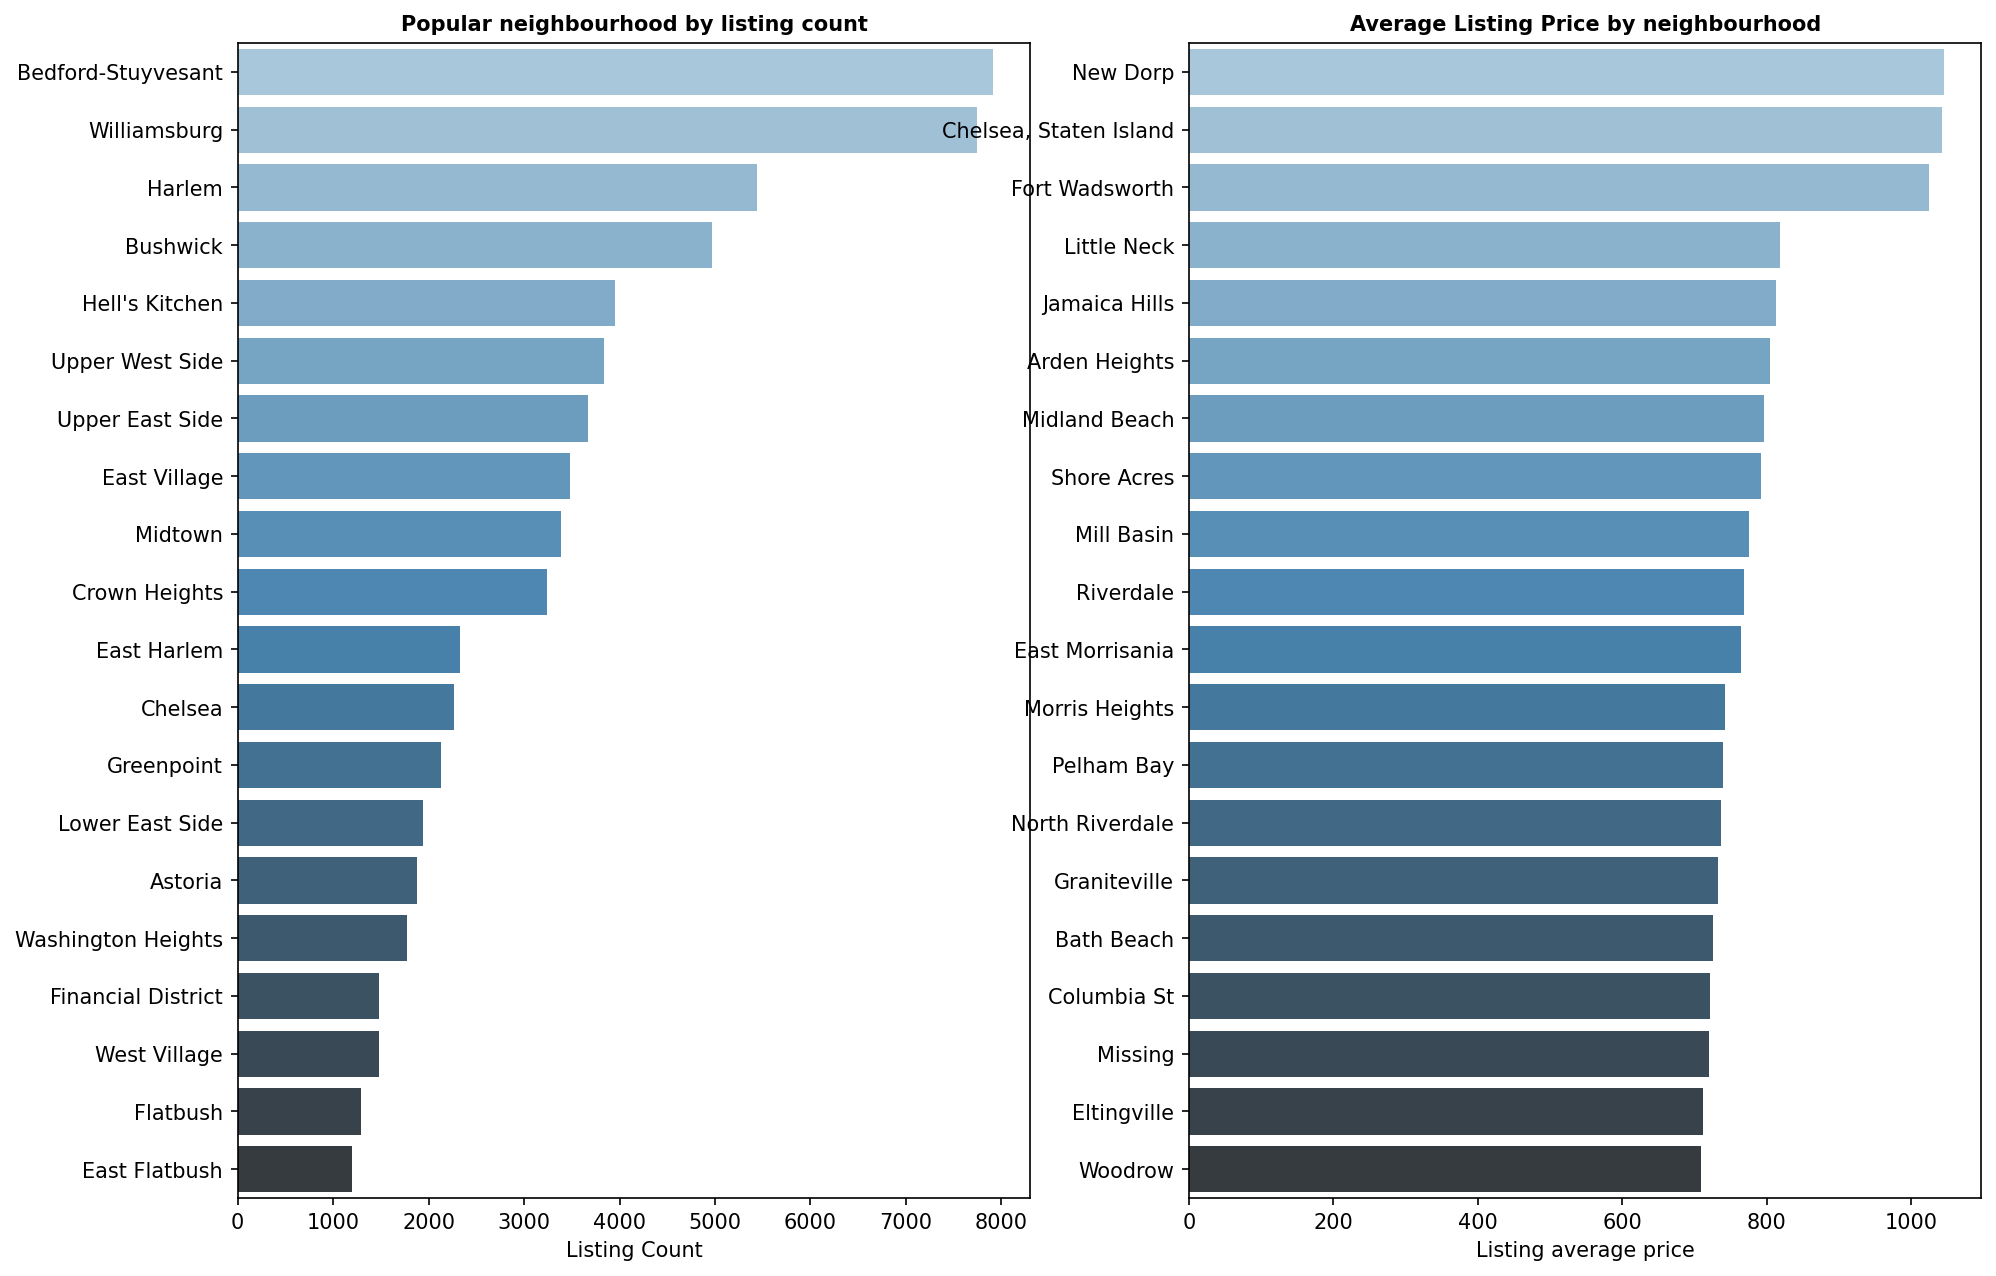

In [43]:
neighbourhood = df_clean[['neighbourhood','id','price']].groupby('neighbourhood').agg({'id':"count" , 'price':np.mean}).reset_index().rename(columns={'neighbourhood':'neighbourhood','id':'count'}).sort_values(by='count', ascending=False)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10),dpi=150)

plot_data = df_clean[['neighbourhood','id','price']].groupby('neighbourhood').agg({'id':'count','price':'mean'}).reset_index()
plot_data.columns=['neighbourhood','calculated host listings count','price']
plot_data1= plot_data[['neighbourhood','calculated host listings count']].sort_values(by='calculated host listings count', ascending=False).head(20)
plot_data2= plot_data[['neighbourhood','price']].sort_values(by='price', ascending=False).head(20)

sns.barplot(data=plot_data1, y='neighbourhood',x='calculated host listings count',palette="Blues_d",ax=ax1).set_title('Popular neighbourhood by listing count',fontsize=10,weight='bold')
sns.barplot(data=plot_data2, y='neighbourhood',x='price',palette="Blues_d",ax=ax2).set_title('Average Listing Price by neighbourhood',fontsize=10,weight='bold')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('Listing Count')
ax2.set_xlabel('Listing average price')

In [44]:
plot_data

,neighbourhood,calculated host listings count,price
0,Allerton,97,636.216495
1,Arden Heights,9,804.888889
2,Arrochar,52,625.730769
3,Arverne,223,652.125561
4,Astoria,1874,638.877801
...,...,...,...
220,Windsor Terrace,330,578.072727
221,Woodhaven,191,631.455497
222,Woodlawn,29,587.137931
223,Woodrow,3,709.333333


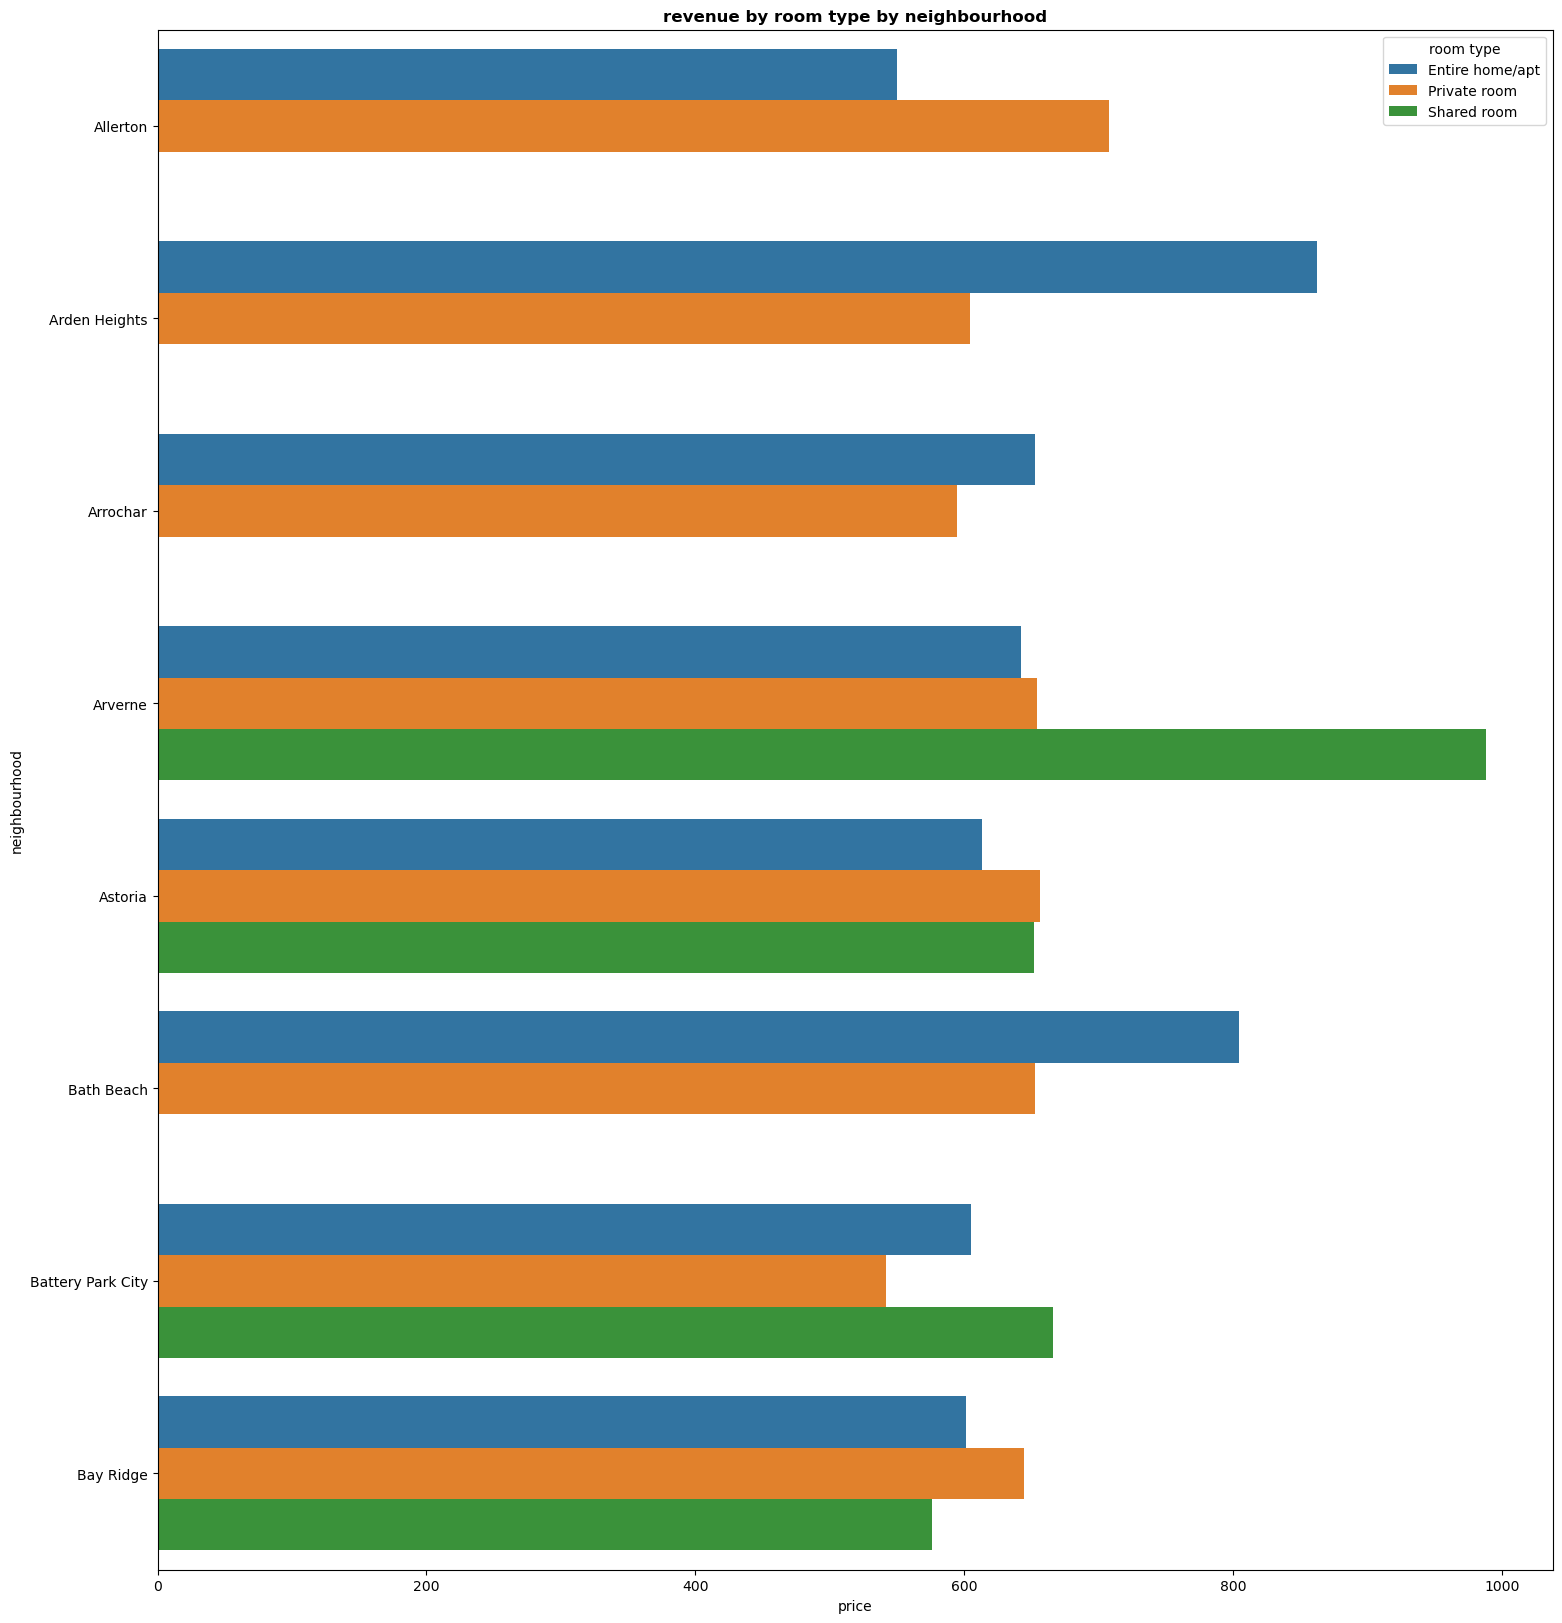

In [61]:
plt.figure(figsize=(18,20))
plot_data = df_clean[['neighbourhood','room type','price']].groupby(['neighbourhood','room type']).mean().reset_index().head(20)
plot_data.columns = ['neighbourhood','room type','price']
plot_data.sort_values(by=['price','neighbourhood','room type'], ascending=False)
#plot_data
sns.barplot(data=plot_data, y='neighbourhood',x='price',hue='room type').set_title('revenue by room type by neighbourhood',fontsize=12,weight='bold');


In [50]:
groupby_host_id_and_host_name=df_clean.groupby(['host id','NAME']).sum()[['reviews per month']].reset_index()
highest_number_of_reviews_per_month=groupby_host_id_and_host_name.sort_values('reviews per month',ascending=False).head(10)
highest_number_of_reviews_per_month['reviews per month']=highest_number_of_reviews_per_month['reviews per month'].apply(lambda x:np.round(x,2))

fig = px.bar(highest_number_of_reviews_per_month, y='reviews per month', x='NAME',text='reviews per month',color='reviews per month',opacity=.8,color_continuous_scale='tealgrn')
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Host has the highest number of reviews per month',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=13),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
fig.show()


In [56]:
df_loca_1=df_clean.groupby(['neighbourhood group','neighbourhood'])[['price','number of reviews']].mean().reset_index().rename(columns={'price':'mean_price'})
df_loca_1['mean_price']=df_loca_1['mean_price'].apply(lambda x:np.round(x,1))
df_loca_1['number of reviews']=df_loca_1['number of reviews'].apply(lambda x:np.round(x,1))
df_loca_2=df_clean.groupby(['neighbourhood group','neighbourhood'])['NAME'].count().reset_index().rename(columns={'NAME':'count'})
     
locations_data=pd.merge(df_loca_1,df_loca_2, on=['neighbourhood group','neighbourhood'])

In [55]:
fig = px.scatter(locations_data, x="count", y="number of reviews",
	         size="number of reviews", color="neighbourhood group",text='number of reviews',
                 hover_name="neighbourhood", log_x=True, size_max=80,opacity=.75,color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_traces(textfont=dict(size=10,color='White'))
fig.update_layout(title='Number of reviews for Each Neighborhood place',autosize=False,yaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)'),xaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)'),
    width=1400,
    height=600,plot_bgcolor='black')
fig.show()